In [112]:
import pandas as pd
import numpy as np

In [113]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


######
Создадим новую переменную Good на основе quality, если quality>5 то 1, иначе 0

In [116]:
df['good']=(df['quality']>5).astype('int')
df['good']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: good, Length: 1599, dtype: int32

In [117]:
data_volatile_acidity=df.groupby('quality').median()['volatile acidity'].reset_index()
data_volatile_acidity

,quality,volatile acidity
0,3,0.845
1,4,0.670
2,5,0.580
3,6,0.490
4,7,0.370
5,8,0.370


In [118]:
import matplotlib.pyplot as plt

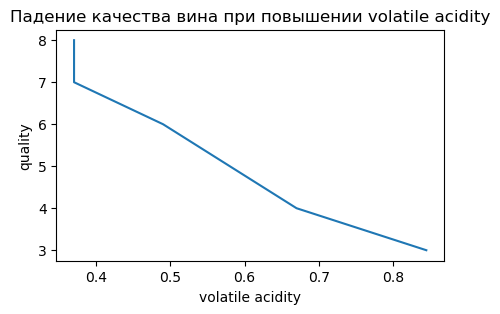

In [119]:
plt.figure(figsize=(5,3))
plt.plot(data_volatile_acidity['volatile acidity'], data_volatile_acidity['quality'])
plt.title('Падение качества вина при повышении volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

In [120]:
data_citric_acid=df.groupby('quality').median()['citric acid'].reset_index()
data_citric_acid

,quality,citric acid
0,3,0.035
1,4,0.090
2,5,0.230
3,6,0.260
4,7,0.400
5,8,0.420


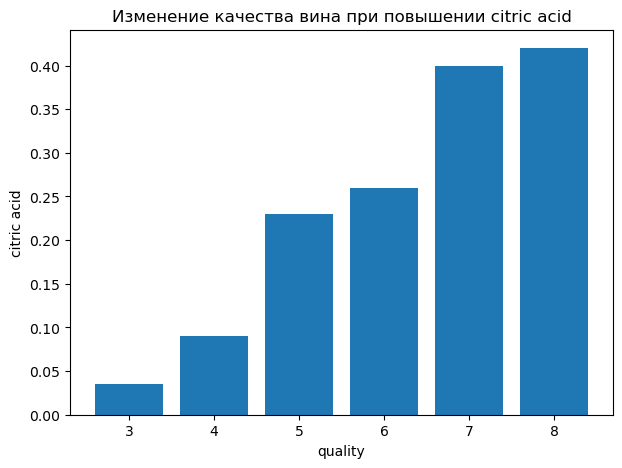

In [121]:
plt.figure(figsize=(7,5))
plt.bar(data_citric_acid['quality'],data_citric_acid['citric acid'])
plt.title('Изменение качества вина при повышении citric acid')
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

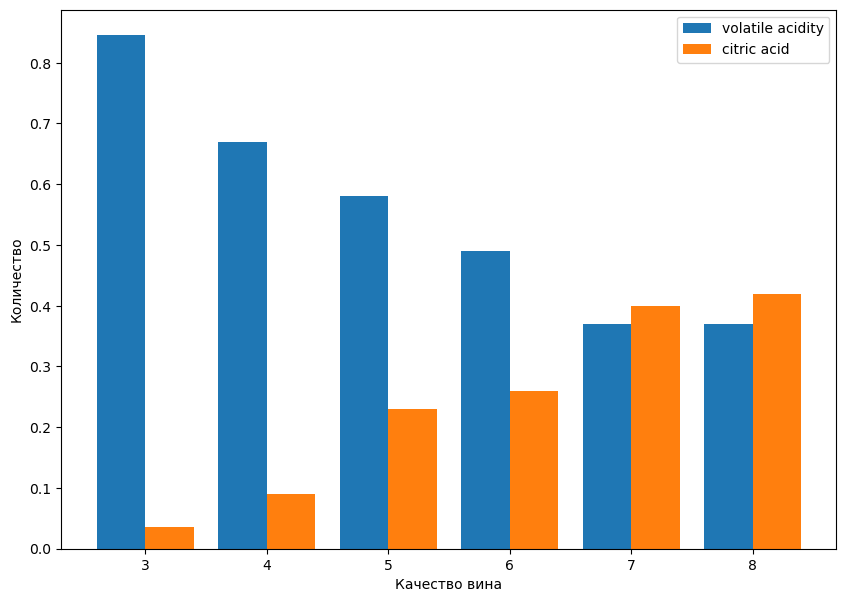

In [122]:
plt.figure(figsize=(10, 7))

w = 0.4
offset = 0.2 #cмещение столбцов

plt.bar(data_volatile_acidity['quality']-offset , data_volatile_acidity['volatile acidity'], label='volatile_acidity', width=w)
plt.bar(data_citric_acid['quality']+offset , data_citric_acid['citric acid'],label='citric_acid',  width=w)
plt.ylabel('Количество')
plt.xlabel('Качество вина')
plt.legend(['volatile acidity', 'citric acid'])

plt.show()

Анализ показал, что в группе хороших вин меньше volatile acidity и больше citric acid.

In [123]:
data=df['good'].value_counts()
data

1    855
0    744
Name: good, dtype: int64

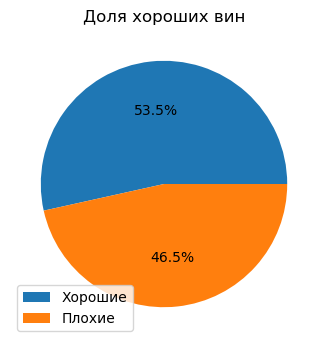

In [124]:
plt.figure(figsize=(6,4))
plt.pie(data,autopct='%1.1f%%')
plt.title('Доля хороших вин')
plt.legend(['Хорошие','Плохие'])
plt.show()


In [125]:
import seaborn as sns

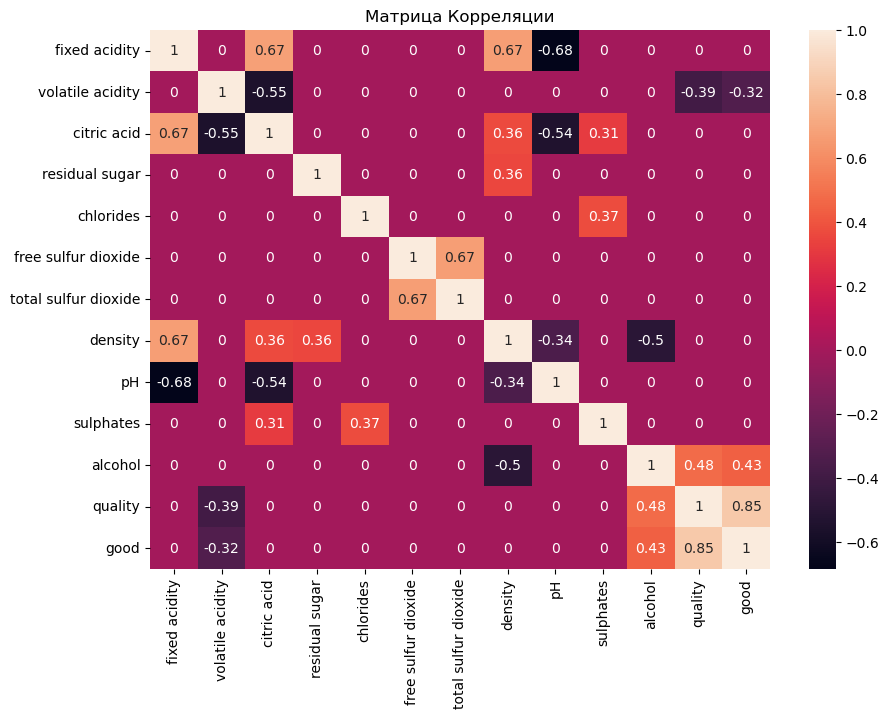

In [126]:
correlation_matrix=df.corr()
correlation_matrix[abs(correlation_matrix)<0.3]=0

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,cmap='rocket', annot=True)
plt.title('Матрица Корреляции')
plt.show()

In [127]:
alcohol1 = df[df['good'] == 1]['alcohol']
alcohol0=df[df['good']==0]['alcohol']


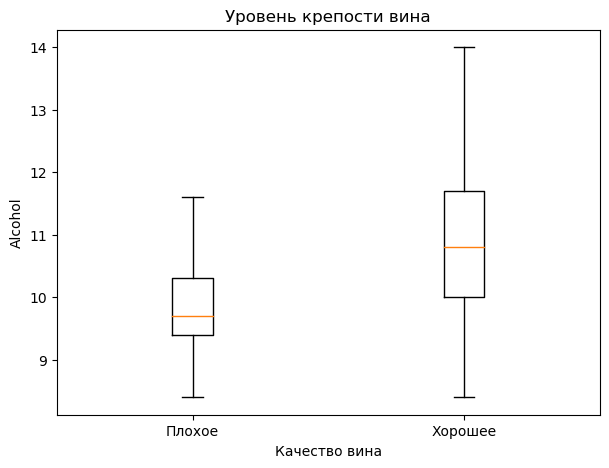

In [128]:
plt.figure(figsize=(7,5))
plt.boxplot([alcohol0,alcohol1],showfliers=False)
plt.title('Уровень крепости вина')
plt.xlabel('Качество вина')
plt.ylabel('Alcohol')
plt.xticks([1, 2], ['Плохое', 'Хорошее'])

plt.show()

Анализ показал, что группа хороших вин отличается от группы плохих вин по медианным показателям в признаке 'alcohol' (в плохих винах уровень алкоголя ниже)

In [129]:
volatile_acidity1 = df[df['good'] == 1]['volatile acidity']
volatile_acidity0 = df[df['good'] == 0]['volatile acidity']

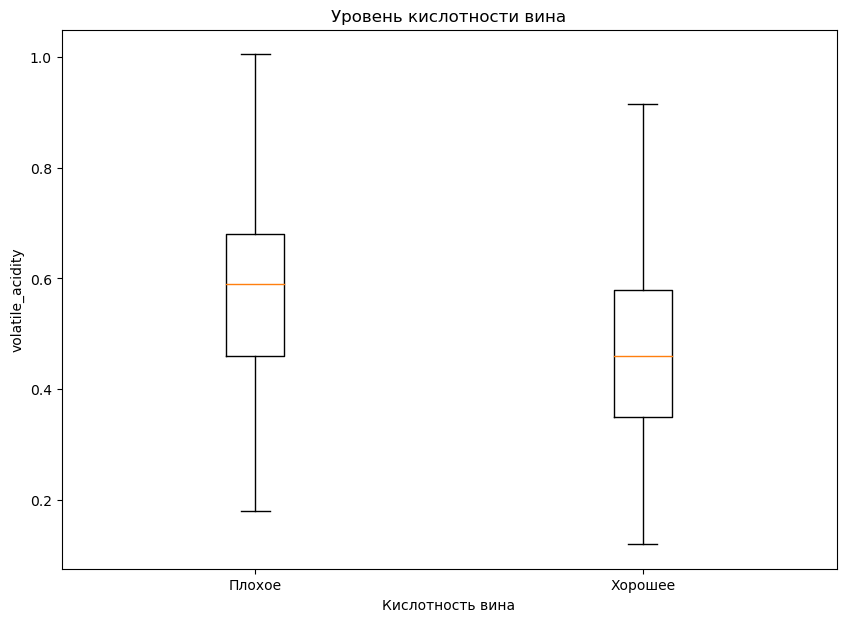

In [130]:
plt.figure(figsize=(10, 7))

plt.boxplot([volatile_acidity0, volatile_acidity1], showfliers=False)

plt.title('Уровень кислотности вина')
plt.xlabel('Кислотность вина')
plt.ylabel('volatile_acidity')
plt.xticks([1, 2], ['Плохое', 'Хорошее'])

plt.show()

Анализ показал, что группа хороших вин отличается от группы плохих вин по медианным показателям в признаке 'volatile_acidity' (в плохих винах уровень кислотности выше).

In [131]:
grouped_median = df.groupby('good').median().drop(columns='quality').transpose().reset_index()


grouped_median = grouped_median.rename(columns={'index': 'feature', 0: 'bad', 1: 'good'})
grouped_median.columns.name = None

grouped_median['median_difference'] = grouped_median['bad'] - grouped_median['good']
grouped_median

,feature,bad,good,median_difference
0,fixed acidity,7.800000,8.0000,-0.200000
1,volatile acidity,0.590000,0.4600,0.130000
2,citric acid,0.220000,0.3100,-0.090000
3,residual sugar,2.200000,2.2000,0.000000
4,chlorides,0.081000,0.0770,0.004000
5,free sulfur dioxide,14.000000,13.0000,1.000000
6,total sulfur dioxide,45.000000,33.0000,12.000000
7,density,0.996935,0.9964,0.000535
8,pH,3.310000,3.3100,0.000000
9,sulphates,0.580000,0.6600,-0.080000


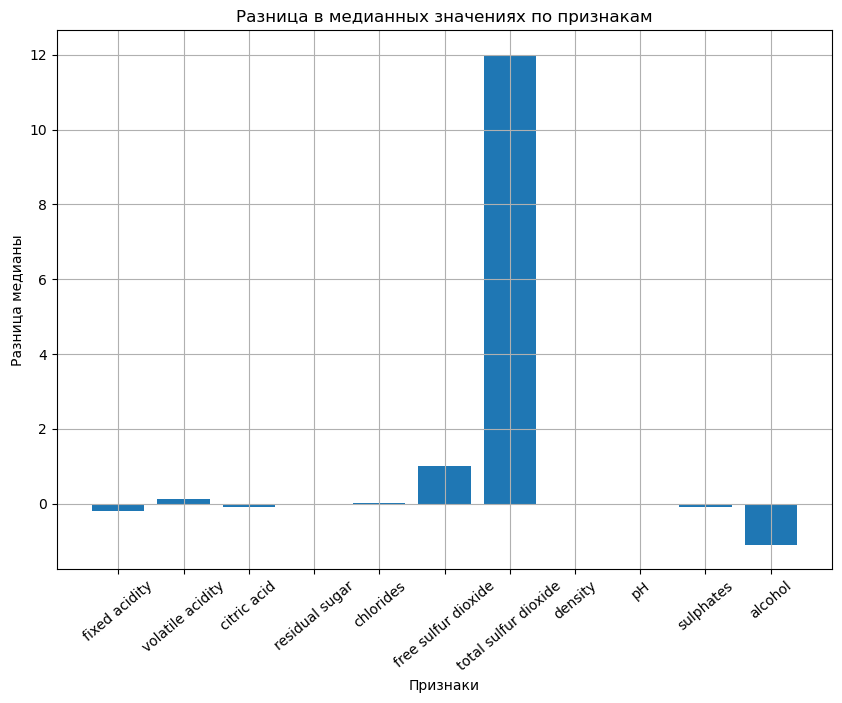

In [132]:


plt.figure(figsize=(10, 7))

n_ticks = np.arange(len(grouped_median))

plt.bar(n_ticks, grouped_median['median_difference'])

plt.title('Разница в медианных значениях по признакам')
plt.xlabel('Признаки')
plt.ylabel('Разница медианы')
plt.xticks(n_ticks, grouped_median['feature'], rotation=40)  
plt.grid()

plt.show()

###### Анализ показал, что группа хороших вин отличается от группы плохих вин по медианным показателям в признаках 'free sulfur dioxide' (больше в плохих винах), 'total sulfur dioxide' (больше в плохих винах) и 'alcohol' (меньше в плохих винах).